In [ ]:
dataset_path='/Users/phomb/Desktop'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


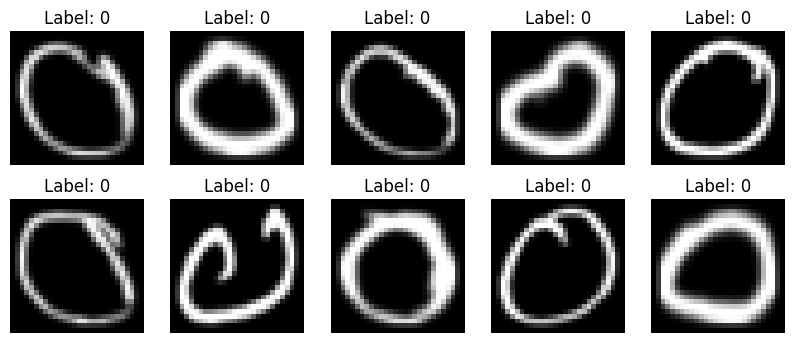

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

train_dir = "/content/drive/MyDrive/2025 - 6CS012 - AI and ML - Student/Week4 ai/Train"
test_dir = "/content/drive/MyDrive/2025 - 6CS012 - AI and ML - Student/Week4 ai/Test"

img_height, img_width = 28, 28 #target image size

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = [d for d in sorted(os.listdir(folder)) if not d.startswith('.') and os.path.isdir(os.path.join(folder, d))]
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    #filters out hidden files (.ds_store for example)
    for class_name in class_names:
        class_path = os.path.join(folder, class_name
                                  )#joins path for exmaple train folder and '0' folder are joned using os.join
        label = class_map[class_name]
        #retrives the label of that class

        for filename in os.listdir(class_path):
            if filename.startswith('.'):
                continue

            img_path = os.path.join(class_path, filename) #joins the folder, class name and image's path
            # Load image using PIL
            img = Image.open(img_path).convert("L")  #  grayscale
            img = img.resize((img_width, img_height))

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)

x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [ ]:
# Build the FCN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
def fcnModel():
    model = Sequential()
    model.add(Flatten(input_shape=(img_height, img_width, 1))) #converts 2D to 1D

    model.add(Dense(64, activation='sigmoid'))    # 1st hidden layer: 64 neurons
    model.add(Dense(128, activation='sigmoid'))   # 2nd hidden layer: 128 neurons
    model.add(Dense(256, activation='sigmoid'))   # 3rd hidden layer: 256 neurons
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

fcn_model = fcnModel()
fcn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.4905 - loss: 1.3926 - val_accuracy: 0.0000e+00 - val_loss: 9.4419
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9154 - loss: 0.2519 - val_accuracy: 0.0000e+00 - val_loss: 10.2485
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9531 - loss: 0.1440 - val_accuracy: 0.0000e+00 - val_loss: 10.9182
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9727 - loss: 0.0939 - val_accuracy: 0.0000e+00 - val_loss: 11.1300
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9810 - loss: 0.0641 - val_accuracy: 0.0000e+00 - val_loss: 11.5399
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9863 - loss: 0.0492 - val_accuracy: 0.0000e+00 - val_loss: 11.9542
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.0000e+00 - val_loss: 11.9163
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - a

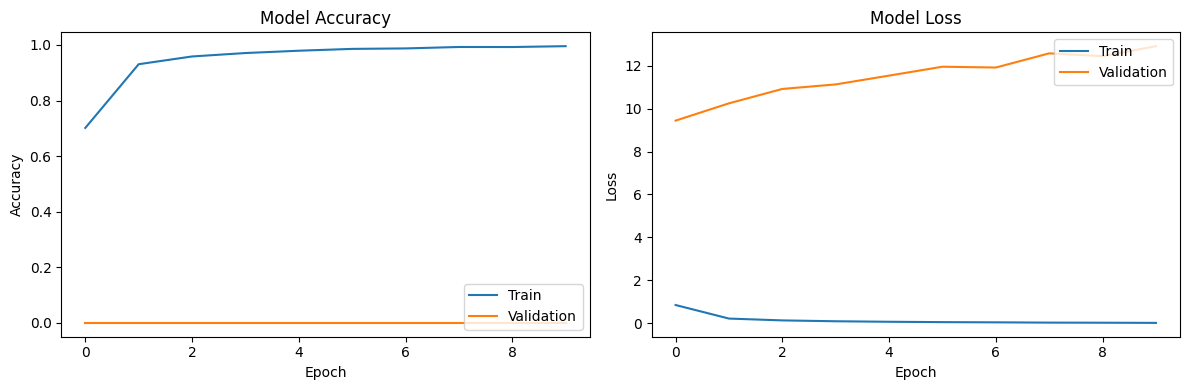

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9534 - loss: 0.4028

Test Loss: 2.6387
Test Accuracy: 0.7803


In [ ]:
batch_size = 32 #divides images into batches of 32
epochs = 10
validation_split = 0.2
history = fcn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=1
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

test_loss, test_accuracy = fcn_model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
fcn_model.save("Devnagari_script.h5")

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("Devnagari_script.h5")
print("Model loaded successfully")
print("\nEvaluating the loaded model on test data:")
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f"Loaded Model - Test Loss: {loaded_test_loss:.4f}")
print(f"Loaded Model - Test Accuracy: {loaded_test_accuracy:.4f}")
print("\nComparing original and loaded model performance:")
print(f"Original Model - Test Accuracy: {test_accuracy:.4f}")
print(f"Loaded Model - Test Accuracy: {loaded_test_accuracy:.4f}")


Model loaded successfully

Evaluating the loaded model on test data:
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9534 - loss: 0.4028
Loaded Model - Test Loss: 2.6387
Loaded Model - Test Accuracy: 0.7803

Comparing original and loaded model performance:
Original Model - Test Accuracy: 0.7803
Loaded Model - Test Accuracy: 0.7803


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


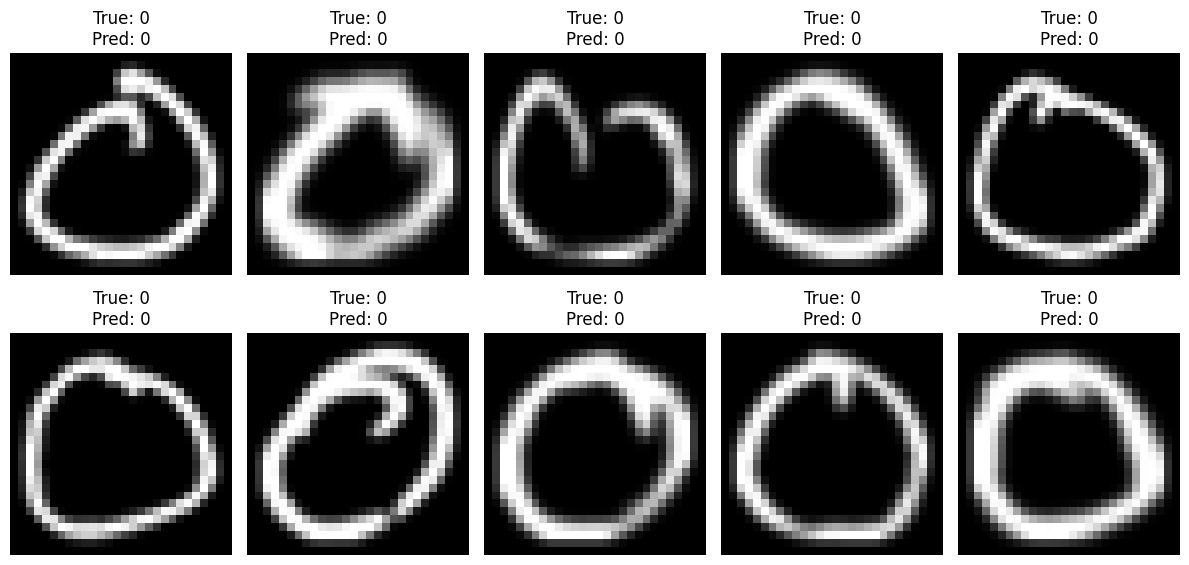

In [ ]:
y_pred = loaded_model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()